# Data México
## Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import requests

## Leemos el archivo JSON del mapa de México

In [2]:
url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
Mx_mapa_estados = requests.get(url).json()

In [3]:
# Averiguamos la manera en la que están escritos los nombres de los estados
states = []
for i in range(32):
    states.append(Mx_mapa_estados["features"][i]["properties"]["name"])

In [4]:
# Organizamos la lista de estados por orden alfabético
states.sort()
states

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Coahuila',
 'Colima',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatán',
 'Zacatecas']

## Leemos los diferentes csv's

### Reporte de mobilidad por estados de México - Google

In [5]:
mob_google = pd.read_csv("2020_MX_Region_Mobility_Report_Google.csv")

In [6]:
mob_google.head(10)

country_region_code country_region sub_region_1  sub_region_2  metro_area  \
0                  MX         Mexico          NaN           NaN         NaN   
1                  MX         Mexico          NaN           NaN         NaN   
2                  MX         Mexico          NaN           NaN         NaN   
3                  MX         Mexico          NaN           NaN         NaN   
4                  MX         Mexico          NaN           NaN         NaN   
5                  MX         Mexico          NaN           NaN         NaN   
6                  MX         Mexico          NaN           NaN         NaN   
7                  MX         Mexico          NaN           NaN         NaN   
8                  MX         Mexico          NaN           NaN         NaN   
9                  MX         Mexico          NaN           NaN         NaN   

  iso_3166_2_code  census_fips_code        date  \
0             NaN               NaN  2020-02-15   
1             NaN               NaN  2020-02-16   
2             NaN               NaN  2020-02-17   
3             NaN               NaN  2020-02-18   
4             NaN               NaN  2020-02-19   
5             NaN               NaN  2020-02-20   
6             NaN               NaN  2020-02-21   
7             NaN               NaN  2020-02-22   
8             NaN               NaN  2020-02-23   
9             NaN               NaN  2020-02-24   

   retail_and_recreation_percent_change_from_baseline  \
0                                                  6    
1                                                  7    
2                                                  2    
3                                                  0    
4                                                  0    
5                                                  0    
6                                                 -2    
7                                                  0    
8                                                  2    
9                                                 -2    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                  4   
1                                                  6   
2                                                  4   
3                                                 -1   
4                                                  0   
5                                                 -1   
6                                                 -2   
7                                                  0   
8                                                  1   
9                                                  0   

   parks_percent_change_from_baseline  \
0                                   6   
1                                   7   
2                                   3   
3                                   3   
4                                   2   
5                                   2   
6                                  -1   
7                                   7   
8                                   8   
9                                   6   

   transit_stations_percent_change_from_baseline  \
0                                            4.0   
1                                            6.0   
2                                            5.0   
3                                            2.0   
4                                            3.0   
5                                            3.0   
6                                            4.0   
7                                            4.0   
8                                            7.0   
9                                            4.0   

   workplaces_percent_change_from_baseline  \
0                                        3   
1                                        2   
2                                       11   
3                                        9   
4                                        8   
5                       

In [7]:
# Checamos la manera en la que están escritos los estados y corroboramos con nuestro mapa. El "nan" hace referencia a el país entero
mob_google["sub_region_1"].unique()

array([nan, 'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
       'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Mexico City', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo Leon',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosi',
       'Sinaloa', 'Sonora', 'State of Mexico', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'], dtype=object)

In [8]:
# Reemplazamos los más obvios para luego comparar con la lista de estados del mapa
mob_google = mob_google.replace(["Mexico City", "State of Mexico"], ["Ciudad de México", "México"])
st_google = []
for i in range(1,33):
    st_google.append(mob_google["sub_region_1"].unique()[i])
st_google.sort()
for i in range(len(st_google)):
    print(st_google[i],states[i])
    # Mas adelante corroborara si los acentos influyen

Aguascalientes Aguascalientes
Baja California Baja California
Baja California Sur Baja California Sur
Campeche Campeche
Chiapas Chiapas
Chihuahua Chihuahua
Ciudad de México Ciudad de México
Coahuila Coahuila
Colima Colima
Durango Durango
Guanajuato Guanajuato
Guerrero Guerrero
Hidalgo Hidalgo
Jalisco Jalisco
Michoacán Michoacán
Morelos Morelos
México México
Nayarit Nayarit
Nuevo Leon Nuevo León
Oaxaca Oaxaca
Puebla Puebla
Querétaro Querétaro
Quintana Roo Quintana Roo
San Luis Potosi San Luis Potosí
Sinaloa Sinaloa
Sonora Sonora
Tabasco Tabasco
Tamaulipas Tamaulipas
Tlaxcala Tlaxcala
Veracruz Veracruz
Yucatan Yucatán
Zacatecas Zacatecas


In [9]:
# Reemplazamos los nombres de los estados para que sean iguales a los del Mapa
for i in range(len(st_google)):
    mob_google = mob_google.replace(st_google[i], states[i])
mob_google["sub_region_1"].unique()

array([nan, 'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
       'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Ciudad de México', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'México', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [10]:
# Cambiamos los nombres de las columnas a español y eliminamos columnas innecesarias
mob_google = mob_google.rename(columns= {'retail_and_recreation_percent_change_from_baseline': "Cambio porcentual en la asistencia a comercios y lugares recreativos",
                            'grocery_and_pharmacy_percent_change_from_baseline': "Cambio porcentual en la asistencia a farmacias y supermercados",
                            'parks_percent_change_from_baseline':"Cambio porcentual en la estadía de parques",
                            'transit_stations_percent_change_from_baseline':'Cambio porcentual en la estadía de estaciones de tránsito',
                            'workplaces_percent_change_from_baseline': "Cambio porcentual en la estadía de lugares de trabajo",
                            'residential_percent_change_from_baseline':"Cambio porcentual en la estadía de lugares residenciales"})
mob_google = mob_google.drop(columns=["sub_region_2", "metro_area", "iso_3166_2_code", "census_fips_code","country_region_code"])
mob_google

country_region sub_region_1        date  \
0            Mexico          NaN  2020-02-15   
1            Mexico          NaN  2020-02-16   
2            Mexico          NaN  2020-02-17   
3            Mexico          NaN  2020-02-18   
4            Mexico          NaN  2020-02-19   
...             ...          ...         ...   
9301         Mexico    Zacatecas  2020-11-18   
9302         Mexico    Zacatecas  2020-11-19   
9303         Mexico    Zacatecas  2020-11-20   
9304         Mexico    Zacatecas  2020-11-21   
9305         Mexico    Zacatecas  2020-11-22   

      Cambio porcentual en la asistencia a comercios y lugares recreativos  \
0                                                     6                      
1                                                     7                      
2                                                     2                      
3                                                     0                      
4                                                     0                      
...                                                 ...                      
9301                                                -32                      
9302                                                -32                      
9303                                                -35                      
9304                                                -35                      
9305                                                -33                      

      Cambio porcentual en la asistencia a farmacias y supermercados  \
0                                                     4                
1                                                     6                
2                                                     4                
3                                                    -1                
4                                                     0                
...                                                 ...                
9301                                                 -8                
9302                                                 -8                
9303                                                 -9                
9304                                                 -8                
9305                                                 -9                

      Cambio porcentual en la estadía de parques  \
0                                              6   
1                                              7   
2                                              3   
3                                              3   
4                                              2   
...                                          ...   
9301                                         -46   
9302                                         -46   
9303                                         -48   
9304                                         -42   
9305                                         -41   

      Cambio porcentual en la estadía de estaciones de tránsito  \
0                                                   4.0           
1                                                   6.0           
2                                                   5.0           
3                                                   2.0           
4                                                   3.0           
...                                                 ...           
9301                                              -34.0           
9302                                              -35.0           
9303                                              -36.0           
9304                                              -35.0           
9305                                              -34.0           

      Cambio porcentual en la estadía de lugares de trabajo  \
0                                                     3       
1                                                     2       
2      

### Gráficas de Prueba

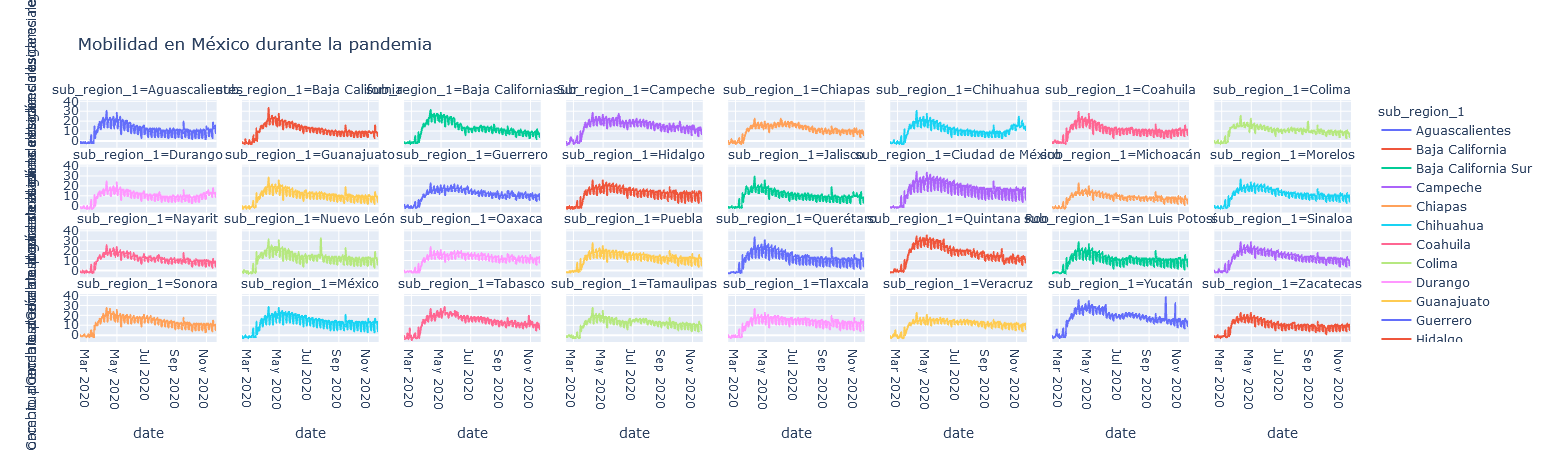

In [44]:
fig = px.line(mob_google[mob_google["sub_region_1"].notnull()], x="date", y="Cambio porcentual en la estadía de lugares residenciales",color="sub_region_1", facet_col = "sub_region_1", facet_col_wrap=8, title = "Mobilidad en México durante la pandemia", )
fig.show()

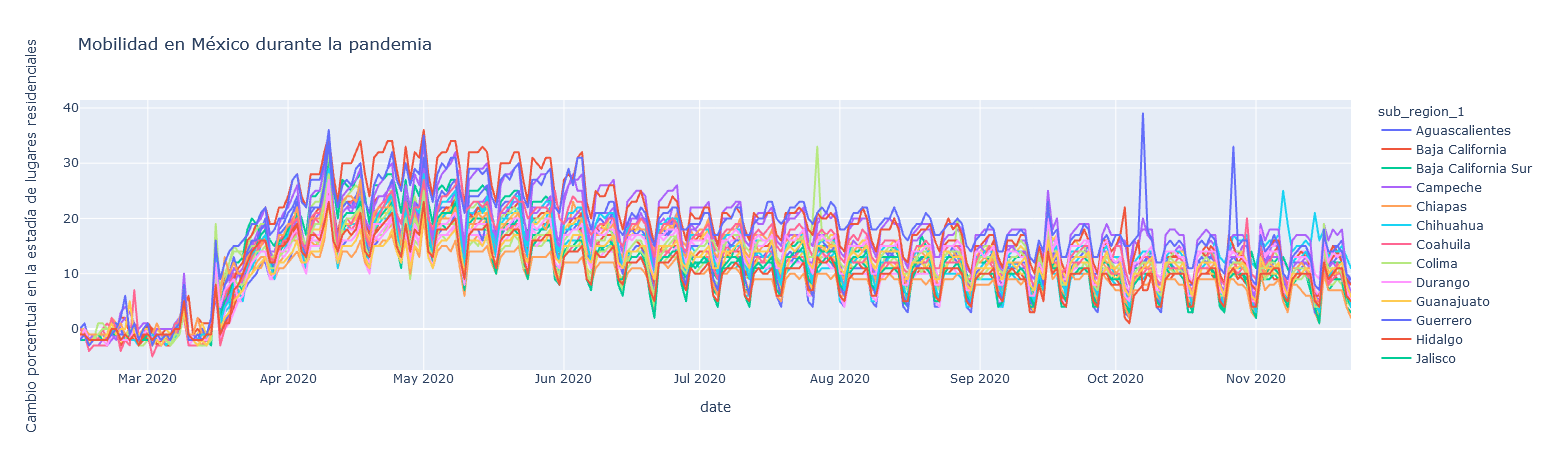

In [46]:
fig = px.line(mob_google[mob_google["sub_region_1"].notnull()], x="date", y="Cambio porcentual en la estadía de lugares residenciales", color="sub_region_1", animation_group="Cambio porcentual en la estadía de lugares residenciales",title = "Mobilidad en México durante la pandemia")
fig.show()

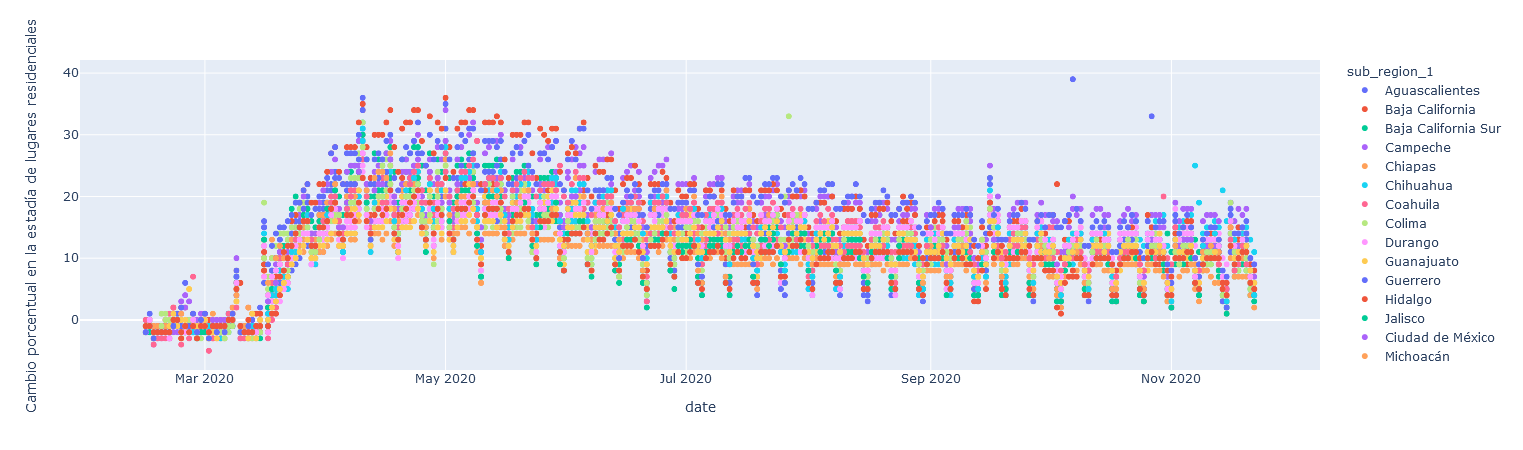

In [22]:
fig = px.scatter(mob_google[mob_google["sub_region_1"].notnull()], x="date",y="Cambio porcentual en la estadía de lugares residenciales",color="sub_region_1")
fig.show()

### Gráficas de movilidad durante la cuarentena para cada estado

Como primer paso hay que definir cuándo empezó la cuarentena en México. Según https://www.gob.mx/cms/uploads/attachment/file/541687/Jornada_Nacional_de_Sana_Distancia.pdf empézó el 23 de Marzo del 2020. Entonces hay que agregar una columna que nos permita discernir entre movilidad pre y durante la cuarentena.

In [25]:
# Creamos una función que nos permita asignar el valor Durante Cuarentena y Antes de la Cuarentena
def cuarentena(fecha):
    # Documentación:
    # Evalúa la fecha de entrada y arroja si ésta ocurrió antes de la cuarentena o después  (23 de Marzo del 2020)
    
    # Argumentos:
    # fecha = e.g. 2020-03-23
    
    f_cuarentena = "2020-03-23"
    # Utilizamos un ciclo if para definir ambos casos
    if fecha < f_cuarentena:
        return "Antes de la Cuarentena"
    else:
        return "Durante la Cuarentena"
    
# Creamos la función que nos devuelva la gráfica
def movilidad_google(df,estado):
    # Documentación:
    # Toma el datafram de movilidad de google procesado y devuelve una gráfica dependiendo del estado que se eligió
    
    # Argumentos:
    # df = dataframe de movilidad de google procesado
    # estado = Nombre del estado (str)
    df["Cuarentena"] = df["date"].apply(cuarentena)
    df_estado = df[df["sub_region_1"] == estado]
    
    import datetime
    df_estado["date"] = pd.to_datetime(df_estado["date"])
    df_estado.set_index("date",inplace=True)
    
    df_estado_2 = df_estado.resample("W").agg("mean")
    
    durante_la_cuarentena = df_estado["Cuarentena"].where(df_estado["Cuarentena"] == "Durante la Cuarentena").first_valid_index()
    antes_de_la_cuarentena = df_estado["Cuarentena"].where(df_estado["Cuarentena"] == "Antes de la Cuarentena").first_valid_index()
    mindate = df_estado.index.min()
    maxdate = df_estado.index.max()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[durante_la_cuarentena],
                             y=[39],
                             text=["Empieza la Cuarentena"],
                             mode="text"))
    
    l = df_estado_2.columns
    colors = ['rgba(152, 0, 0, .8)','green','red','orange','MediumPurple','DarkBlue']
    
    for i in range(len(l)):
        fig.add_trace(go.Scatter(x=df_estado_2.index,
                                 y=df_estado_2[l[i]],
                                 mode="lines+markers",
                                 name=l[i],
                                 marker_color=colors[i])
                     )
        
        fig.update_layout(xaxis=dict(range=[mindate,maxdate]), template="plotly_white")
        
        fig.update_layout(title="Cambios en la Movilidad de los Habitantes de {} durante la Cuarentena".format(estado),
                          width=1400,
                          height=600,
                          legend_title="Movilidad",
                          shapes=[dict(type="line",
                                       x0=mindate,
                                       y0=0,
                                       x1=maxdate,
                                       y1=0,
                                       line_width=2,
                                       line= dict(dash="dot")),
                                  dict(type="line",
                                       x0=durante_la_cuarentena,
                                       y0=-100,
                                       x1=durante_la_cuarentena,
                                       y1=37,
                                       line_width=2,
                                       line= dict(dash="dot"))
                                 ]
                         )
    return fig.show()

<ipython-input-25-3050c3b8fa08>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



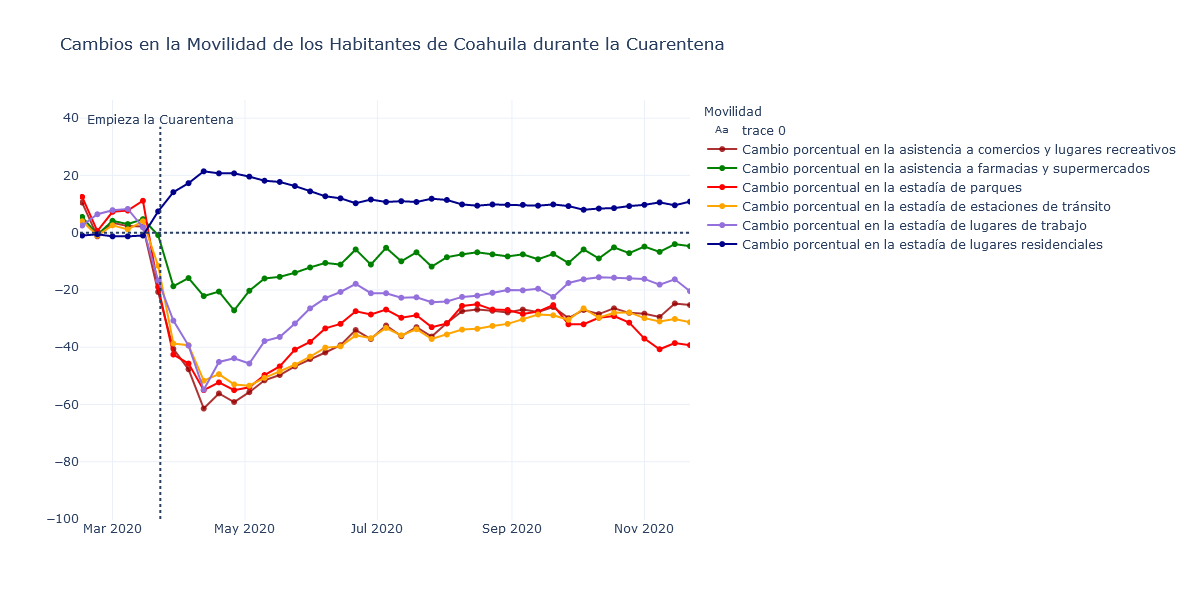

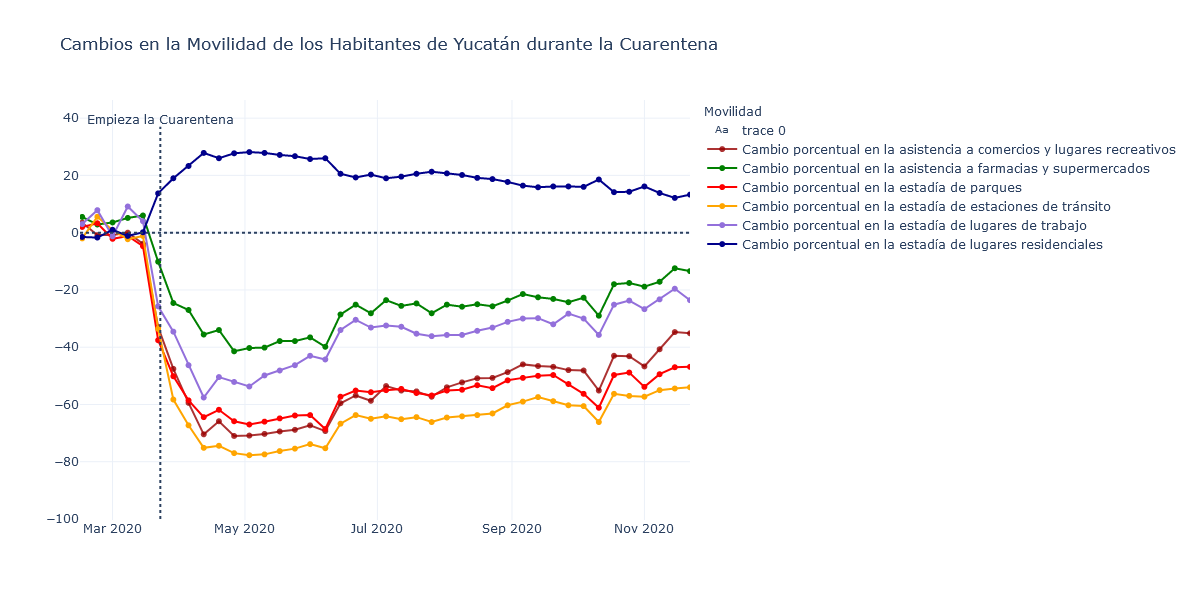

In [26]:
movilidad_google(mob_google,"Coahuila")
movilidad_google(mob_google,"Yucatán")

In [208]:
# Probamos la función
mob_google["Cuarentena"] = mob_google["date"].apply(cuarentena)
mob_google

country_region_code country_region sub_region_1        date  \
0                     MX         Mexico          NaN  2020-02-15   
1                     MX         Mexico          NaN  2020-02-16   
2                     MX         Mexico          NaN  2020-02-17   
3                     MX         Mexico          NaN  2020-02-18   
4                     MX         Mexico          NaN  2020-02-19   
...                  ...            ...          ...         ...   
9301                  MX         Mexico    Zacatecas  2020-11-18   
9302                  MX         Mexico    Zacatecas  2020-11-19   
9303                  MX         Mexico    Zacatecas  2020-11-20   
9304                  MX         Mexico    Zacatecas  2020-11-21   
9305                  MX         Mexico    Zacatecas  2020-11-22   

      Cambio porcentual en la asistencia a comercios y lugares recreativos  \
0                                                     6                      
1                                                     7                      
2                                                     2                      
3                                                     0                      
4                                                     0                      
...                                                 ...                      
9301                                                -32                      
9302                                                -32                      
9303                                                -35                      
9304                                                -35                      
9305                                                -33                      

      Cambio porcentual en la asistencia a farmacias y supermercados  \
0                                                     4                
1                                                     6                
2                                                     4                
3                                                    -1                
4                                                     0                
...                                                 ...                
9301                                                 -8                
9302                                                 -8                
9303                                                 -9                
9304                                                 -8                
9305                                                 -9                

      Cambio porcentual en la estadía de parques  \
0                                              6   
1                                              7   
2                                              3   
3                                              3   
4                                              2   
...                                          ...   
9301                                         -46   
9302                                         -46   
9303                                         -48   
9304                                         -42   
9305                                         -41   

      Cambio porcentual en la estadía de estaciones de tránsito  \
0                                                   4.0           
1                                                   6.0           
2                                                   5.0           
3                                                   2.0           
4                                                   3.0           
...                                                 ...           
9301                                              -34.0           
9302                                              -35.0           
9303                                              -36.0           
9304                                              -35.0           
9305                    

In [209]:
# Filtramos la tabla por estado
mob_yuc = mob_google[mob_google["sub_region_1"] == "Yucatán"]
mob_yuc

country_region_code country_region sub_region_1        date  \
8742                  MX         Mexico      Yucatán  2020-02-15   
8743                  MX         Mexico      Yucatán  2020-02-16   
8744                  MX         Mexico      Yucatán  2020-02-17   
8745                  MX         Mexico      Yucatán  2020-02-18   
8746                  MX         Mexico      Yucatán  2020-02-19   
...                  ...            ...          ...         ...   
9019                  MX         Mexico      Yucatán  2020-11-18   
9020                  MX         Mexico      Yucatán  2020-11-19   
9021                  MX         Mexico      Yucatán  2020-11-20   
9022                  MX         Mexico      Yucatán  2020-11-21   
9023                  MX         Mexico      Yucatán  2020-11-22   

      Cambio porcentual en la asistencia a comercios y lugares recreativos  \
8742                                                  5                      
8743                                                  2                      
8744                                                  2                      
8745                                                 -1                      
8746                                                  0                      
...                                                 ...                      
9019                                                -32                      
9020                                                -31                      
9021                                                -33                      
9022                                                -39                      
9023                                                -44                      

      Cambio porcentual en la asistencia a farmacias y supermercados  \
8742                                                  7                
8743                                                  4                
8744                                                  6                
8745                                                  4                
8746                                                  3                
...                                                 ...                
9019                                                -12                
9020                                                -13                
9021                                                 -9                
9022                                                -12                
9023                                                -21                

      Cambio porcentual en la estadía de parques  \
8742                                           5   
8743                                          -1   
8744                                           2   
8745                                           5   
8746                                           7   
...                                          ...   
9019                                         -44   
9020                                         -47   
9021                                         -44   
9022                                         -46   
9023                                         -54   

      Cambio porcentual en la estadía de estaciones de tránsito  \
8742                                               -2.0           
8743                                               -2.0           
8744                                                8.0           
8745                                                2.0           
8746                                                4.0           
...                                                 ...           
9019                                              -53.0           
9020                                              -53.0           
9021                                              -53.0           
9022                                              -55.0           
9023                    

In [196]:
import datetime

In [211]:
mob_yuc["date"] = pd.to_datetime(mob_yuc["date"])
mob_yuc.set_index("date",inplace=True)

In [212]:
mob_yuc_2 = mob_yuc.resample("W").agg("mean")

In [213]:
mob_yuc_2

Cambio porcentual en la asistencia a comercios y lugares recreativos  \
date                                                                               
2020-02-16                                           3.500000                      
2020-02-23                                          -0.857143                      
2020-03-01                                          -0.857143                      
2020-03-08                                           0.000000                      
2020-03-15                                          -3.857143                      
2020-03-22                                         -33.000000                      
2020-03-29                                         -47.571429                      
2020-04-05                                         -59.428571                      
2020-04-12                                         -70.428571                      
2020-04-19                                         -65.857143                      
2020-04-26                                         -71.000000                      
2020-05-03                                         -70.857143                      
2020-05-10                                         -70.285714                      
2020-05-17                                         -69.428571                      
2020-05-24                                         -68.857143                      
2020-05-31                                         -67.285714                      
2020-06-07                                         -69.285714                      
2020-06-14                                         -59.571429                      
2020-06-21                                         -56.857143                      
2020-06-28                                         -58.714286                      
2020-07-05                                         -53.571429                      
2020-07-12                                         -55.142857                      
2020-07-19                                         -55.428571                      
2020-07-26                                         -57.285714                      
2020-08-02                                         -54.000000                      
2020-08-09                                         -52.285714                      
2020-08-16                                         -50.857143                      
2020-08-23                                         -50.714286                      
2020-08-30                                         -48.714286                      
2020-09-06                                         -46.000000                      
2020-09-13                                         -46.571429                      
2020-09-20                                         -46.857143                      
2020-09-27                                         -48.000000                      
2020-10-04                                         -48.142857                      
2020-10-11                                         -55.142857                      
2020-10-18                                         -43.000000                      
2020-10-25                                         -43.142857                      
2020-11-01                                         -46.714286                      
2020-11-08                                         -40.714286                      
2020-11-15                                         -34.714286                      
2020-11-22                                         -35.142857                      

            Cambio porcentual en la asistencia a farmacias y supermercados  \
date                                                                         
2020-02-16                                           5.500000                
2020-02-23                                           2.857143                
2020-03-01                                           3.571429                
2020-03-0

In [215]:
Durante_la_Cuarentena = mob_yuc["Cuarentena"].where(mob_yuc["Cuarentena"] == "Durante la Cuarentena").first_valid_index()
Antes_de_la_Cuarentena = mob_yuc["Cuarentena"].where(mob_yuc["Cuarentena"] == "Antes de la Cuarentena").first_valid_index()
mindate = mob_yuc.index.min()
maxdate = mob_yuc.index.max()

#lockdown1 = df_india_Telangana_and_AP["LockdownPhase"].where(df_india_Telangana_and_AP["LockdownPhase"]=="Lockdown Phase 1").first_valid_index()

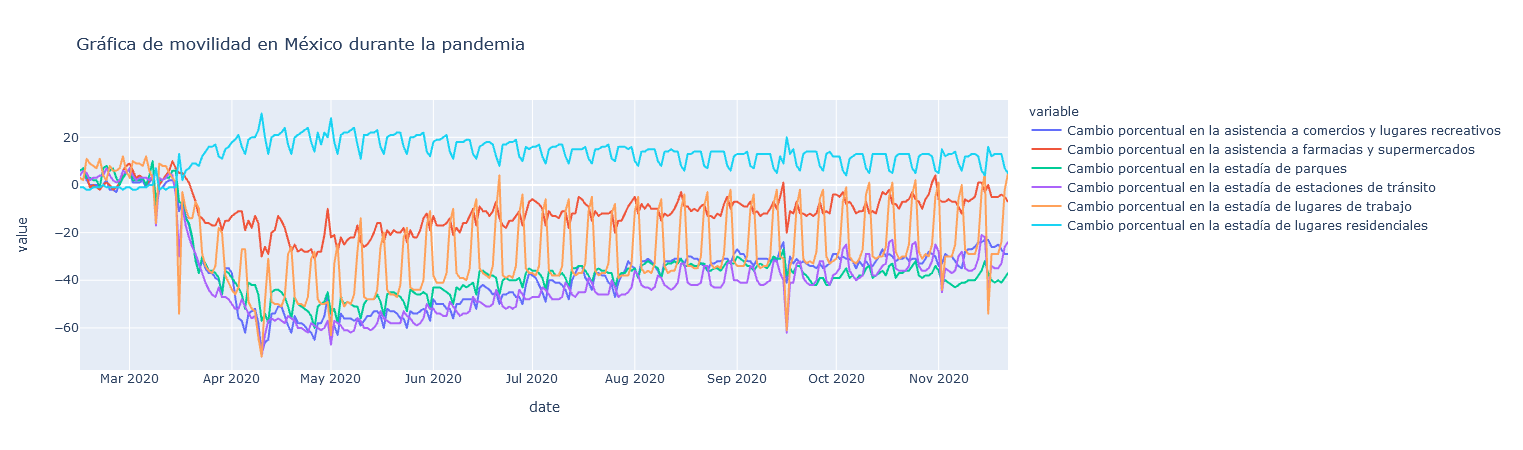

In [14]:
fig = px.line(mob_google[mob_google["sub_region_1"].isnull()], x="date", y=["Cambio porcentual en la asistencia a comercios y lugares recreativos",
                                                                                "Cambio porcentual en la asistencia a farmacias y supermercados",
                                                                                "Cambio porcentual en la estadía de parques",
                                                                                "Cambio porcentual en la estadía de estaciones de tránsito",
                                                                                "Cambio porcentual en la estadía de lugares de trabajo",
                                                                                "Cambio porcentual en la estadía de lugares residenciales"],
             title = "Gráfica de movilidad en México durante la pandemia")
fig.show()

### Reporte de movilidad en México - Apple

In [100]:
mob_apple = pd.read_csv("apple_mobility_trends-2020-11-25.csv")

In [101]:
mob_apple.head(10)

geo_type     region transportation_type alternative_name sub-region  \
0  country/region    Albania             driving              NaN        NaN   
1  country/region    Albania             walking              NaN        NaN   
2  country/region  Argentina             driving              NaN        NaN   
3  country/region  Argentina             walking              NaN        NaN   
4  country/region  Australia             driving               AU        NaN   
5  country/region  Australia             transit               AU        NaN   
6  country/region  Australia             walking               AU        NaN   
7  country/region    Austria             driving       Österreich        NaN   
8  country/region    Austria             walking       Österreich        NaN   
9  country/region    Belgium             driving  België|Belgique        NaN   

  country  2020-01-13  2020-01-14  2020-01-15  2020-01-16  ...  2020-11-16  \
0     NaN       100.0       95.30      101.43       97.20  ...       98.04   
1     NaN       100.0      100.68       98.93       98.46  ...      138.00   
2     NaN       100.0       97.07      102.45      111.21  ...       61.42   
3     NaN       100.0       95.11      101.37      112.67  ...       52.37   
4     NaN       100.0      102.98      104.21      108.63  ...       97.26   
5     NaN       100.0      101.78      100.64       99.58  ...       61.78   
6     NaN       100.0      101.31      101.82      104.52  ...       77.13   
7     NaN       100.0      101.14      104.24      112.21  ...       83.79   
8     NaN       100.0      101.55      105.59      112.24  ...       69.52   
9     NaN       100.0      101.19      107.49      107.67  ...       78.12   

   2020-11-17  2020-11-18  2020-11-19  2020-11-20  2020-11-21  2020-11-22  \
0       91.08       90.14       97.88       99.05      111.07      115.80   
1      129.17      121.41      126.01      120.09      123.58      107.08   
2       64.85       70.25       73.21       91.41       99.28       72.55   
3       55.46       57.55       60.21       70.59       68.75       45.72   
4      101.44      101.82      109.64      108.84       91.48       95.10   
5       62.79       62.17       66.55       69.77       57.04       60.45   
6       80.66       81.56       88.82      106.37       86.94       76.02   
7       62.18       65.30       64.30       61.09       53.08       58.79   
8       52.56       56.40       51.79       49.55       47.28       48.09   
9       79.44       87.29       81.04       84.86       78.68       71.01   

   2020-11-23  2020-11-24  2020-11-25  
0       99.44       97.01       94.64  
1      128.61      119.49      122.56  
2       59.53       60.29       63.91  
3       42.96       49.73       53.32  
4       99.52      103.98      107.94  
5       64.65       67.14       69.48  
6       81.94       85.49       88.96  
7       65.65       67.90       67.28  
8       53.23       55.09       54.14  
9       80.45       82.04       83.95  

[10 rows x 324 columns]

In [105]:
# Filtramos la tabla por los datos de México
mx_mob_apple = mob_apple.loc[mob_apple['region'] == "Mexico"]
mx_mob_apple

geo_type  region transportation_type alternative_name sub-region  \
82  country/region  Mexico             driving           México        NaN   
83  country/region  Mexico             transit           México        NaN   
84  country/region  Mexico             walking           México        NaN   

   country  2020-01-13  2020-01-14  2020-01-15  2020-01-16  ...  2020-11-16  \
82     NaN       100.0      100.53      102.35      106.06  ...       87.51   
83     NaN       100.0      100.05      100.15      101.98  ...       51.13   
84     NaN       100.0      102.15      105.42      107.62  ...       87.62   

    2020-11-17  2020-11-18  2020-11-19  2020-11-20  2020-11-21  2020-11-22  \
82       84.85       86.40       90.21      109.71      116.34       86.12   
83       56.13       55.53       56.64       57.83       53.96       47.66   
84       92.23       91.70       96.81      112.07      121.36       86.29   

    2020-11-23  2020-11-24  2020-11-25  
82       85.82       86.95       89.94  
83       55.33       56.84       55.98  
84       96.52       96.57       99.74  

[3 rows x 324 columns]

In [106]:
# Eliminamos columnas innecesarias y con NA
mx_mob_apple = mx_mob_apple.drop(columns=["alternative_name", "sub-region", "country"])
mx_mob_apple = mx_mob_apple.dropna(axis=1) 
mx_mob_apple

geo_type  region transportation_type  2020-01-13  2020-01-14  \
82  country/region  Mexico             driving       100.0      100.53   
83  country/region  Mexico             transit       100.0      100.05   
84  country/region  Mexico             walking       100.0      102.15   

    2020-01-15  2020-01-16  2020-01-17  2020-01-18  2020-01-19  ...  \
82      102.35      106.06      127.97      134.25       93.02  ...   
83      100.15      101.98      110.88       96.82       77.79  ...   
84      105.42      107.62      127.85      135.02       87.85  ...   

    2020-11-16  2020-11-17  2020-11-18  2020-11-19  2020-11-20  2020-11-21  \
82       87.51       84.85       86.40       90.21      109.71      116.34   
83       51.13       56.13       55.53       56.64       57.83       53.96   
84       87.62       92.23       91.70       96.81      112.07      121.36   

    2020-11-22  2020-11-23  2020-11-24  2020-11-25  
82       86.12       85.82       86.95       89.94  
83       47.66       55.33       56.84       55.98  
84       86.29       96.52       96.57       99.74  

[3 rows x 319 columns]

In [107]:
# Traducimos a español el tipo de transporte
mx_mob_apple = mx_mob_apple.replace(["driving","transit","walking"], ["Automóvil Propio", "Transporte Público", "Caminando"])
mx_mob_apple

geo_type  region transportation_type  2020-01-13  2020-01-14  \
82  country/region  Mexico    Automóvil Propio       100.0      100.53   
83  country/region  Mexico  Transporte Público       100.0      100.05   
84  country/region  Mexico           Caminando       100.0      102.15   

    2020-01-15  2020-01-16  2020-01-17  2020-01-18  2020-01-19  ...  \
82      102.35      106.06      127.97      134.25       93.02  ...   
83      100.15      101.98      110.88       96.82       77.79  ...   
84      105.42      107.62      127.85      135.02       87.85  ...   

    2020-11-16  2020-11-17  2020-11-18  2020-11-19  2020-11-20  2020-11-21  \
82       87.51       84.85       86.40       90.21      109.71      116.34   
83       51.13       56.13       55.53       56.64       57.83       53.96   
84       87.62       92.23       91.70       96.81      112.07      121.36   

    2020-11-22  2020-11-23  2020-11-24  2020-11-25  
82       86.12       85.82       86.95       89.94  
83       47.66       55.33       56.84       55.98  
84       86.29       96.52       96.57       99.74  

[3 rows x 319 columns]

In [111]:
fig = px.line(mx_mob_apple, x = "transportation_type", y = [mx_mob_apple.iloc[0,3:],mx_mob_apple.iloc[1,3:],mx_mob_apple.iloc[2,3:]],title = "Reporte de Transporte en México durante la pandemia - Apple")

TypeError: hasattr(): attribute name must be string

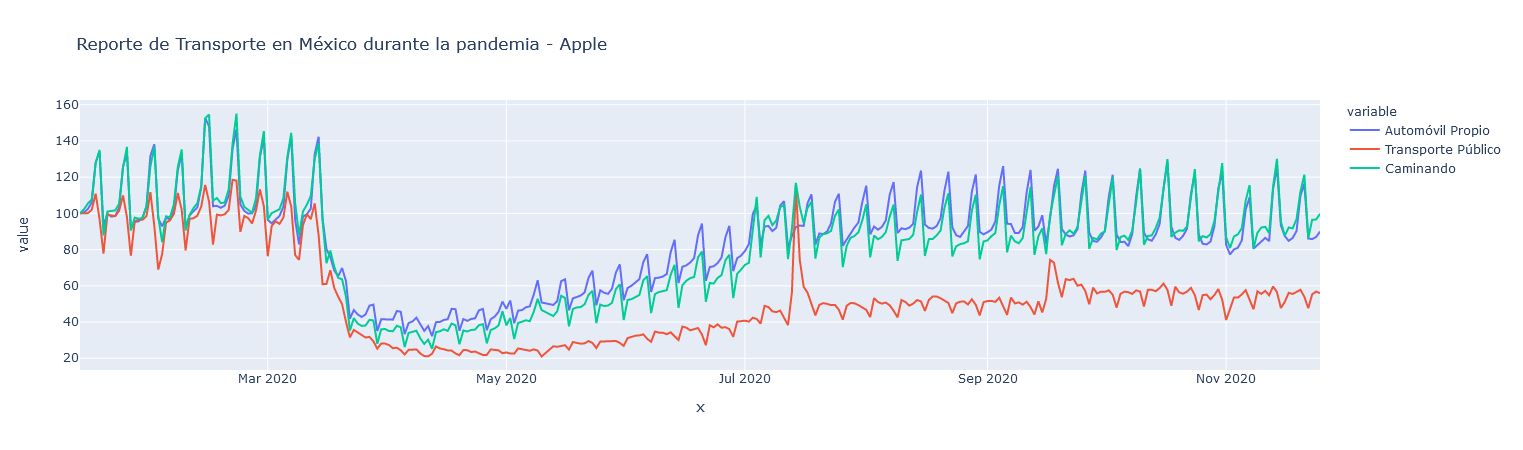

In [110]:
fig = px.line(x = mx_mob_apple.columns[3:], y = [mx_mob_apple.iloc[0,3:],mx_mob_apple.iloc[1,3:],mx_mob_apple.iloc[2,3:]],title = "Reporte de Transporte en México durante la pandemia - Apple")
for i in range(3):
    fig.data[i].name = mx_mob_apple.iloc[i,2]
fig.show()

### Reporte de Delitos por Municipio del 2015 al 2020 - México

In [47]:
md = pd.read_csv("Municipal-Delitos-2015-2020_oct2020.csv", encoding="latin_1")

In [48]:
md.head(10)

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2015          1  Aguascalientes            1001  Aguascalientes   
1  2015          1  Aguascalientes            1001  Aguascalientes   
2  2015          1  Aguascalientes            1001  Aguascalientes   
3  2015          1  Aguascalientes            1001  Aguascalientes   
4  2015          1  Aguascalientes            1001  Aguascalientes   
5  2015          1  Aguascalientes            1001  Aguascalientes   
6  2015          1  Aguascalientes            1001  Aguascalientes   
7  2015          1  Aguascalientes            1001  Aguascalientes   
8  2015          1  Aguascalientes            1001  Aguascalientes   
9  2015          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   
5  La vida y la Integridad corporal      Homicidio  Homicidio culposo   
6  La vida y la Integridad corporal      Homicidio  Homicidio culposo   
7  La vida y la Integridad corporal      Homicidio  Homicidio culposo   
8  La vida y la Integridad corporal      Homicidio  Homicidio culposo   
9  La vida y la Integridad corporal       Lesiones   Lesiones dolosas   

                  Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  \
0         Con arma de fuego      2  ...      1      1     0      1      1   
1           Con arma blanca      1  ...      0      0     0      1      0   
2         Con otro elemento      0  ...      1      1     3      2      0   
3           No especificado      1  ...      0      1     0      0      0   
4         Con arma de fuego      0  ...      0      0     1      0      0   
5           Con arma blanca      0  ...      0      0     0      0      0   
6  En accidente de tránsito      9  ...      3     11     6      4      6   
7         Con otro elemento      0  ...      0      0     0      1      0   
8           No especificado      1  ...      0      3     0      0      0   
9         Con arma de fuego      1  ...      4      1     1      1      3   

   Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0       0           2        1        0.0        1.0  
1       1           0        0        0.0        0.0  
2       1           2        0        0.0        0.0  
3       0           0        0        0.0        0.0  
4       0           0        0        0.0        0.0  
5       0           0        0        0.0        0.0  
6       6          11        6        3.0        7.0  
7       0           0        0        0.0        0.0  
8       0           0        0        0.0        0.0  
9       2           1        3        2.0        2.0  

[10 rows x 21 columns]

In [49]:
# Eliminamos columnas innecesarias
md = md.drop(columns=["Cve. Municipio", "Municipio", "Bien jurídico afectado", "Subtipo de delito", "Modalidad"])
md

Año  Clave_Ent         Entidad  \
0        2015          1  Aguascalientes   
1        2015          1  Aguascalientes   
2        2015          1  Aguascalientes   
3        2015          1  Aguascalientes   
4        2015          1  Aguascalientes   
...       ...        ...             ...   
1346613  2020         32       Zacatecas   
1346614  2020         32       Zacatecas   
1346615  2020         32       Zacatecas   
1346616  2020         32       Zacatecas   
1346617  2020         32       Zacatecas   

                                    Tipo de delito  Enero  Febrero  Marzo  \
0                                        Homicidio      2        0      1   
1                                        Homicidio      1        1      0   
2                                        Homicidio      0        0      1   
3                                        Homicidio      1        0      0   
4                                        Homicidio      0        0      0   
...                                            ...    ...      ...    ...   
1346613                              Falsificación      0        0      0   
1346614                   Contra el medio ambiente      0        0      0   
1346615  Delitos cometidos por servidores públicos      0        0      0   
1346616                                Electorales      0        0      0   
1346617              Otros delitos del Fuero Común      1        0      0   

         Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0            1     0      1      1       0           2        1        0.0   
1            0     0      1      0       1           0        0        0.0   
2            1     3      2      0       1           2        0        0.0   
3            1     0      0      0       0           0        0        0.0   
4            0     1      0      0       0           0        0        0.0   
...        ...   ...    ...    ...     ...         ...      ...        ...   
1346613      0     0      0      0       0           0        0        NaN   
1346614      0     0      0      0       0           0        0        NaN   
1346615      0     0      0      0       0           0        0        NaN   
1346616      0     0      0      0       0           0        0        NaN   
1346617      0     0      0      0       0           0        1        NaN   

         Diciembre  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
1346613        NaN  
1346614        NaN  
1346615        NaN  
1346616        NaN  
1346617        NaN  

[1346618 rows x 16 columns]

In [39]:
# Buscamos is hay NA
md.isnull().values.any()

True

In [50]:
# Reemplazamos con NA con 0
md = md.fillna(0)

In [117]:
# Verificamos si siguen habiendo NA
md.isnull().values.any()

False

In [51]:
md

Año  Clave_Ent         Entidad  \
0        2015          1  Aguascalientes   
1        2015          1  Aguascalientes   
2        2015          1  Aguascalientes   
3        2015          1  Aguascalientes   
4        2015          1  Aguascalientes   
...       ...        ...             ...   
1346613  2020         32       Zacatecas   
1346614  2020         32       Zacatecas   
1346615  2020         32       Zacatecas   
1346616  2020         32       Zacatecas   
1346617  2020         32       Zacatecas   

                                    Tipo de delito  Enero  Febrero  Marzo  \
0                                        Homicidio      2        0      1   
1                                        Homicidio      1        1      0   
2                                        Homicidio      0        0      1   
3                                        Homicidio      1        0      0   
4                                        Homicidio      0        0      0   
...                                            ...    ...      ...    ...   
1346613                              Falsificación      0        0      0   
1346614                   Contra el medio ambiente      0        0      0   
1346615  Delitos cometidos por servidores públicos      0        0      0   
1346616                                Electorales      0        0      0   
1346617              Otros delitos del Fuero Común      1        0      0   

         Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0            1     0      1      1       0           2        1        0.0   
1            0     0      1      0       1           0        0        0.0   
2            1     3      2      0       1           2        0        0.0   
3            1     0      0      0       0           0        0        0.0   
4            0     1      0      0       0           0        0        0.0   
...        ...   ...    ...    ...     ...         ...      ...        ...   
1346613      0     0      0      0       0           0        0        0.0   
1346614      0     0      0      0       0           0        0        0.0   
1346615      0     0      0      0       0           0        0        0.0   
1346616      0     0      0      0       0           0        0        0.0   
1346617      0     0      0      0       0           0        1        0.0   

         Diciembre  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
1346613        0.0  
1346614        0.0  
1346615        0.0  
1346616        0.0  
1346617        0.0  

[1346618 rows x 16 columns]

In [52]:
# Convertimos valores flot a int para que se parezcan a los demás
md["Noviembre"] = md["Noviembre"].astype(int)
md["Diciembre"] = md["Diciembre"].astype(int)
md

Año  Clave_Ent         Entidad  \
0        2015          1  Aguascalientes   
1        2015          1  Aguascalientes   
2        2015          1  Aguascalientes   
3        2015          1  Aguascalientes   
4        2015          1  Aguascalientes   
...       ...        ...             ...   
1346613  2020         32       Zacatecas   
1346614  2020         32       Zacatecas   
1346615  2020         32       Zacatecas   
1346616  2020         32       Zacatecas   
1346617  2020         32       Zacatecas   

                                    Tipo de delito  Enero  Febrero  Marzo  \
0                                        Homicidio      2        0      1   
1                                        Homicidio      1        1      0   
2                                        Homicidio      0        0      1   
3                                        Homicidio      1        0      0   
4                                        Homicidio      0        0      0   
...                                            ...    ...      ...    ...   
1346613                              Falsificación      0        0      0   
1346614                   Contra el medio ambiente      0        0      0   
1346615  Delitos cometidos por servidores públicos      0        0      0   
1346616                                Electorales      0        0      0   
1346617              Otros delitos del Fuero Común      1        0      0   

         Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0            1     0      1      1       0           2        1          0   
1            0     0      1      0       1           0        0          0   
2            1     3      2      0       1           2        0          0   
3            1     0      0      0       0           0        0          0   
4            0     1      0      0       0           0        0          0   
...        ...   ...    ...    ...     ...         ...      ...        ...   
1346613      0     0      0      0       0           0        0          0   
1346614      0     0      0      0       0           0        0          0   
1346615      0     0      0      0       0           0        0          0   
1346616      0     0      0      0       0           0        0          0   
1346617      0     0      0      0       0           0        1          0   

         Diciembre  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
1346613          0  
1346614          0  
1346615          0  
1346616          0  
1346617          0  

[1346618 rows x 16 columns]

In [113]:
md = md.drop(columns=["Municipio"])
md

Año  Clave_Ent         Entidad  \
0        2015          1  Aguascalientes   
1        2015          1  Aguascalientes   
2        2015          1  Aguascalientes   
3        2015          1  Aguascalientes   
4        2015          1  Aguascalientes   
...       ...        ...             ...   
1346613  2020         32       Zacatecas   
1346614  2020         32       Zacatecas   
1346615  2020         32       Zacatecas   
1346616  2020         32       Zacatecas   
1346617  2020         32       Zacatecas   

                                    Tipo de delito  Enero  Febrero  Marzo  \
0                                        Homicidio      2        0      1   
1                                        Homicidio      1        1      0   
2                                        Homicidio      0        0      1   
3                                        Homicidio      1        0      0   
4                                        Homicidio      0        0      0   
...                                            ...    ...      ...    ...   
1346613                              Falsificación      0        0      0   
1346614                   Contra el medio ambiente      0        0      0   
1346615  Delitos cometidos por servidores públicos      0        0      0   
1346616                                Electorales      0        0      0   
1346617              Otros delitos del Fuero Común      1        0      0   

         Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0            1     0      1      1       0           2        1          0   
1            0     0      1      0       1           0        0          0   
2            1     3      2      0       1           2        0          0   
3            1     0      0      0       0           0        0          0   
4            0     1      0      0       0           0        0          0   
...        ...   ...    ...    ...     ...         ...      ...        ...   
1346613      0     0      0      0       0           0        0          0   
1346614      0     0      0      0       0           0        0          0   
1346615      0     0      0      0       0           0        0          0   
1346616      0     0      0      0       0           0        0          0   
1346617      0     0      0      0       0           0        1          0   

         Diciembre  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
1346613          0  
1346614          0  
1346615          0  
1346616          0  
1346617          0  

[1346618 rows x 16 columns]

In [53]:
# Sumamos los tipos de delitos iguales (hay muchos debido a que eliminamos los subdelitos)
month_sum_dict = {"Enero":"sum","Febrero":"sum","Marzo":"sum","Abril":"sum","Mayo":"sum","Junio":"sum","Julio":"sum","Agosto":"sum","Septiembre":"sum","Octubre":"sum","Noviembre":"sum","Diciembre":"sum"}
md = md.groupby(["Año","Clave_Ent","Entidad","Tipo de delito"], as_index=False).agg(month_sum_dict)
md

Año  Clave_Ent         Entidad  \
0     2015          1  Aguascalientes   
1     2015          1  Aguascalientes   
2     2015          1  Aguascalientes   
3     2015          1  Aguascalientes   
4     2015          1  Aguascalientes   
...    ...        ...             ...   
7675  2020         32       Zacatecas   
7676  2020         32       Zacatecas   
7677  2020         32       Zacatecas   
7678  2020         32       Zacatecas   
7679  2020         32       Zacatecas   

                                         Tipo de delito  Enero  Febrero  \
0                                                Aborto      0        3   
1                                    Abuso de confianza     41       33   
2                                          Abuso sexual      6        4   
3                                          Acoso sexual      0        0   
4                                Allanamiento de morada     13       11   
...                                                 ...    ...      ...   
7675                                 Tráfico de menores      0        0   
7676                               Violación equiparada      7        4   
7677                                   Violación simple      7       15   
7678  Violencia de género en todas sus modalidades d...      0        0   
7679                                 Violencia familiar    246      237   

      Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  \
0         1      0     0      0      0       0           0        0   
1        31     22    36     43     30      40          40       34   
2         0      2     1      1      1       1           0        0   
3         0      0     0      0      0       0           0        0   
4        18     16    16     19     18      19          15       11   
...     ...    ...   ...    ...    ...     ...         ...      ...   
7675      0      0     0      0      0       0           0        0   
7676     10      6    16     10      9       4          14        5   
7677     23      7     6     12     16      21          10        8   
7678      0      0     0      0      0       0           0        0   
7679    288    245   262    363    291     323         266      266   

      Noviembre  Diciembre  
0             1          0  
1            43         26  
2             1          1  
3             0          0  
4             4          9  
...         ...        ...  
7675          0          0  
7676          0          0  
7677          0          0  
7678          0          0  
7679          0          0  

[7680 rows x 16 columns]

In [154]:
md2 = md.iloc[:,3:].T
md2

0                   1             2             3     \
Tipo de delito  Aborto  Abuso de confianza  Abuso sexual  Acoso sexual   
Enero                0                  41             6             0   
Febrero              3                  33             4             0   
Marzo                1                  31             0             0   
Abril                0                  22             2             0   
Mayo                 0                  36             1             0   
Junio                0                  43             1             0   
Julio                0                  30             1             0   
Agosto               0                  40             1             0   
Septiembre           0                  40             0             0   
Octubre              0                  34             0             0   
Noviembre            1                  43             1             0   
Diciembre            0                  26             1             0   

                                  4         5                         6     \
Tipo de delito  Allanamiento de morada  Amenazas  Contra el medio ambiente   
Enero                               13        98                         0   
Febrero                             11       111                         0   
Marzo                               18        87                         1   
Abril                               16       123                         0   
Mayo                                16        93                         1   
Junio                               19       109                         0   
Julio                               18        99                         0   
Agosto                              19        95                         0   
Septiembre                          15        84                         0   
Octubre                             11       101                         0   
Noviembre                            4        81                         3   
Diciembre                            9        67                         0   

                                 7                    8     \
Tipo de delito  Corrupción de menores  Daño a la propiedad   
Enero                               5                  201   
Febrero                             2                  180   
Marzo                              10                  182   
Abril                               4                  160   
Mayo                                7                  121   
Junio                               4                  166   
Julio                               8                  160   
Agosto                              3                  151   
Septiembre                          4                  178   
Octubre                             5                  133   
Noviembre                           4                  121   
Diciembre                           1                  107   

                                                     9     ...  \
Tipo de delito  Delitos cometidos por servidores públicos  ...   
Enero                                                   1  ...   
Febrero                                                 2  ...   
Marzo                                                   0  ...   
Abril                                                   0  ...   
Mayo                                                    2  ...   
Junio                                                   0  ...   
Julio                                                   1  ...   
Agosto                                                  0  ...   
Septiembre                                              0  ...   
Octubre                                                 0  ...   
Noviembre                                               0  ...   
Diciembre                                               0  ...   

                                                             7670   7671  \
Tipo de delito  Ot

In [54]:
# Verificamos los estados en md sean iguales a los del mapa
md_st = []
for state in md["Entidad"].unique():
    md_st.append(state)
md_st.sort()
for i in range(len(states)):
    print(md_st[i],states[i])

Aguascalientes Aguascalientes
Baja California Baja California
Baja California Sur Baja California Sur
Campeche Campeche
Chiapas Chiapas
Chihuahua Chihuahua
Ciudad de México Ciudad de México
Coahuila de Zaragoza Coahuila
Colima Colima
Durango Durango
Guanajuato Guanajuato
Guerrero Guerrero
Hidalgo Hidalgo
Jalisco Jalisco
Michoacán de Ocampo Michoacán
Morelos Morelos
México México
Nayarit Nayarit
Nuevo León Nuevo León
Oaxaca Oaxaca
Puebla Puebla
Querétaro Querétaro
Quintana Roo Quintana Roo
San Luis Potosí San Luis Potosí
Sinaloa Sinaloa
Sonora Sonora
Tabasco Tabasco
Tamaulipas Tamaulipas
Tlaxcala Tlaxcala
Veracruz de Ignacio de la Llave Veracruz
Yucatán Yucatán
Zacatecas Zacatecas


In [55]:
# Reemplazamos los nombres de los estados para que sean iguales a los del Mapa
for i in range(len(states)):
    md = md.replace(md_st[i], states[i])
md["Entidad"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua',
       'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

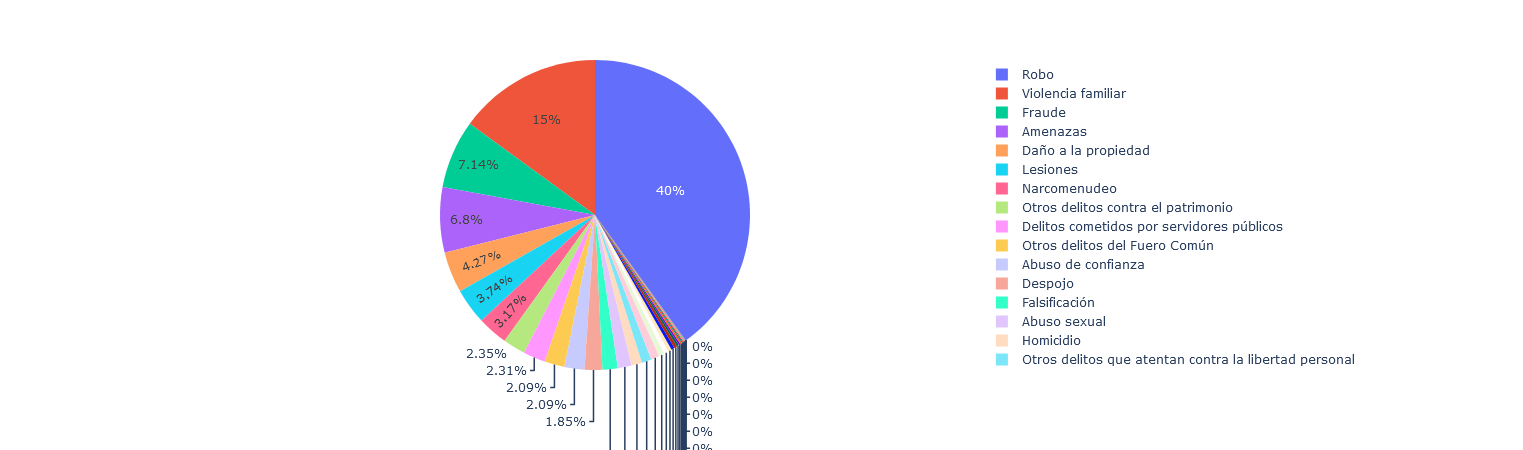

In [137]:
fig = px.pie(md[(md["Año"]==2020) & (md["Entidad"]=="Ciudad de México")], values="Junio", names="Tipo de delito", hover_name="Año")
fig.show()

In [146]:
x = [col for col in md.columns[4:]]
x

['Enero',
 'Febrero',
 'Marzo',
 'Abril',
 'Mayo',
 'Junio',
 'Julio',
 'Agosto',
 'Septiembre',
 'Octubre',
 'Noviembre',
 'Diciembre']

In [188]:
# Filtrado de delitos
md_delitos = md.loc[md["Tipo de delito"].isin(["Violencia familiar", "Abuso sexual", "Feminicidio", "Homicidio","Violación simple",
                                               "Acoso sexual", "Violación equiparada", "Aborto", "Hostigamiento sexual", "Incesto",
                                               "Violencia de género en todas sus modalidades distinta a la violencia familiar",
                                               "Otros delitos contra la familia", "Corrupción de menores",
                                               "Otros delitos que atentan contra la libertad y la seguridad sexual"])]
md_delitos

Año  Clave_Ent         Entidad  \
0     2015          1  Aguascalientes   
2     2015          1  Aguascalientes   
3     2015          1  Aguascalientes   
7     2015          1  Aguascalientes   
16    2015          1  Aguascalientes   
...    ...        ...             ...   
7669  2020         32       Zacatecas   
7676  2020         32       Zacatecas   
7677  2020         32       Zacatecas   
7678  2020         32       Zacatecas   
7679  2020         32       Zacatecas   

                                         Tipo de delito  Enero  Febrero  \
0                                                Aborto      0        3   
2                                          Abuso sexual      6        4   
3                                          Acoso sexual      0        0   
7                                 Corrupción de menores      5        2   
16                                          Feminicidio      0        0   
...                                                 ...    ...      ...   
7669  Otros delitos que atentan contra la libertad y...      5        4   
7676                               Violación equiparada      7        4   
7677                                   Violación simple      7       15   
7678  Violencia de género en todas sus modalidades d...      0        0   
7679                                 Violencia familiar    246      237   

      Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  Octubre  \
0         1      0     0      0      0       0           0        0   
2         0      2     1      1      1       1           0        0   
3         0      0     0      0      0       0           0        0   
7        10      4     7      4      8       3           4        5   
16        0      0     0      0      0       0           0        0   
...     ...    ...   ...    ...    ...     ...         ...      ...   
7669     12     11     8      9      6       7           5       11   
7676     10      6    16     10      9       4          14        5   
7677     23      7     6     12     16      21          10        8   
7678      0      0     0      0      0       0           0        0   
7679    288    245   262    363    291     323         266      266   

      Noviembre  Diciembre  
0             1          0  
2             1          1  
3             0          0  
7             4          1  
16            0          0  
...         ...        ...  
7669          0          0  
7676          0          0  
7677          0          0  
7678          0          0  
7679          0          0  

[2688 rows x 16 columns]

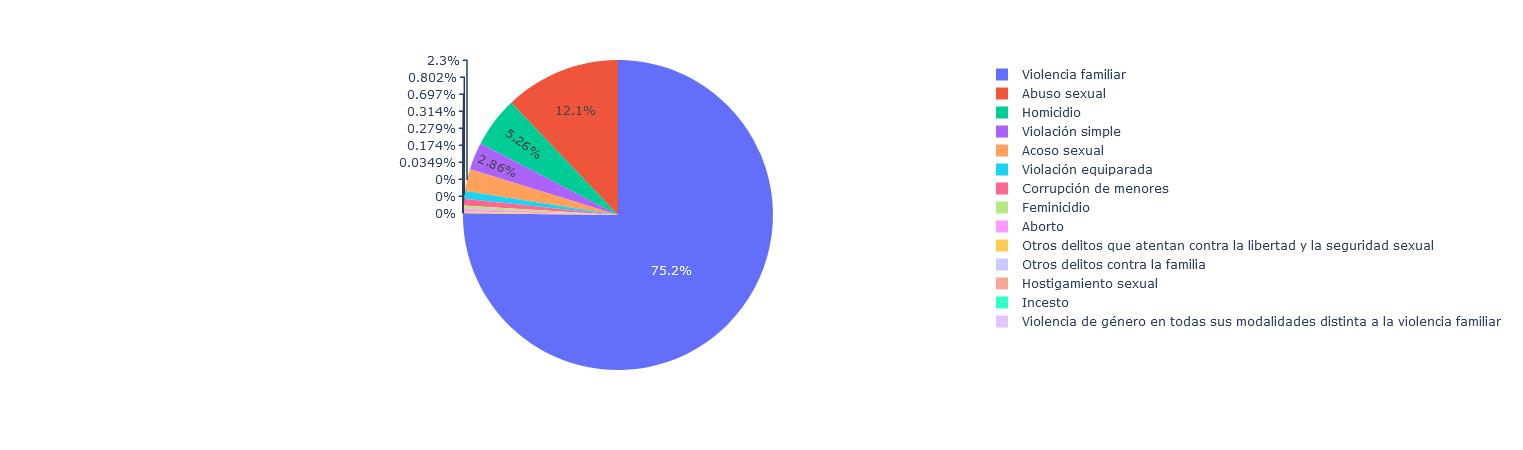

In [214]:
fig = px.pie(md_delitos[(md_delitos["Año"]==2019) & (md_delitos["Entidad"]=="Ciudad de México")], values="Junio", names="Tipo de delito", hover_name="Año")
fig.show()

In [74]:
md.columns[4:]

Index(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

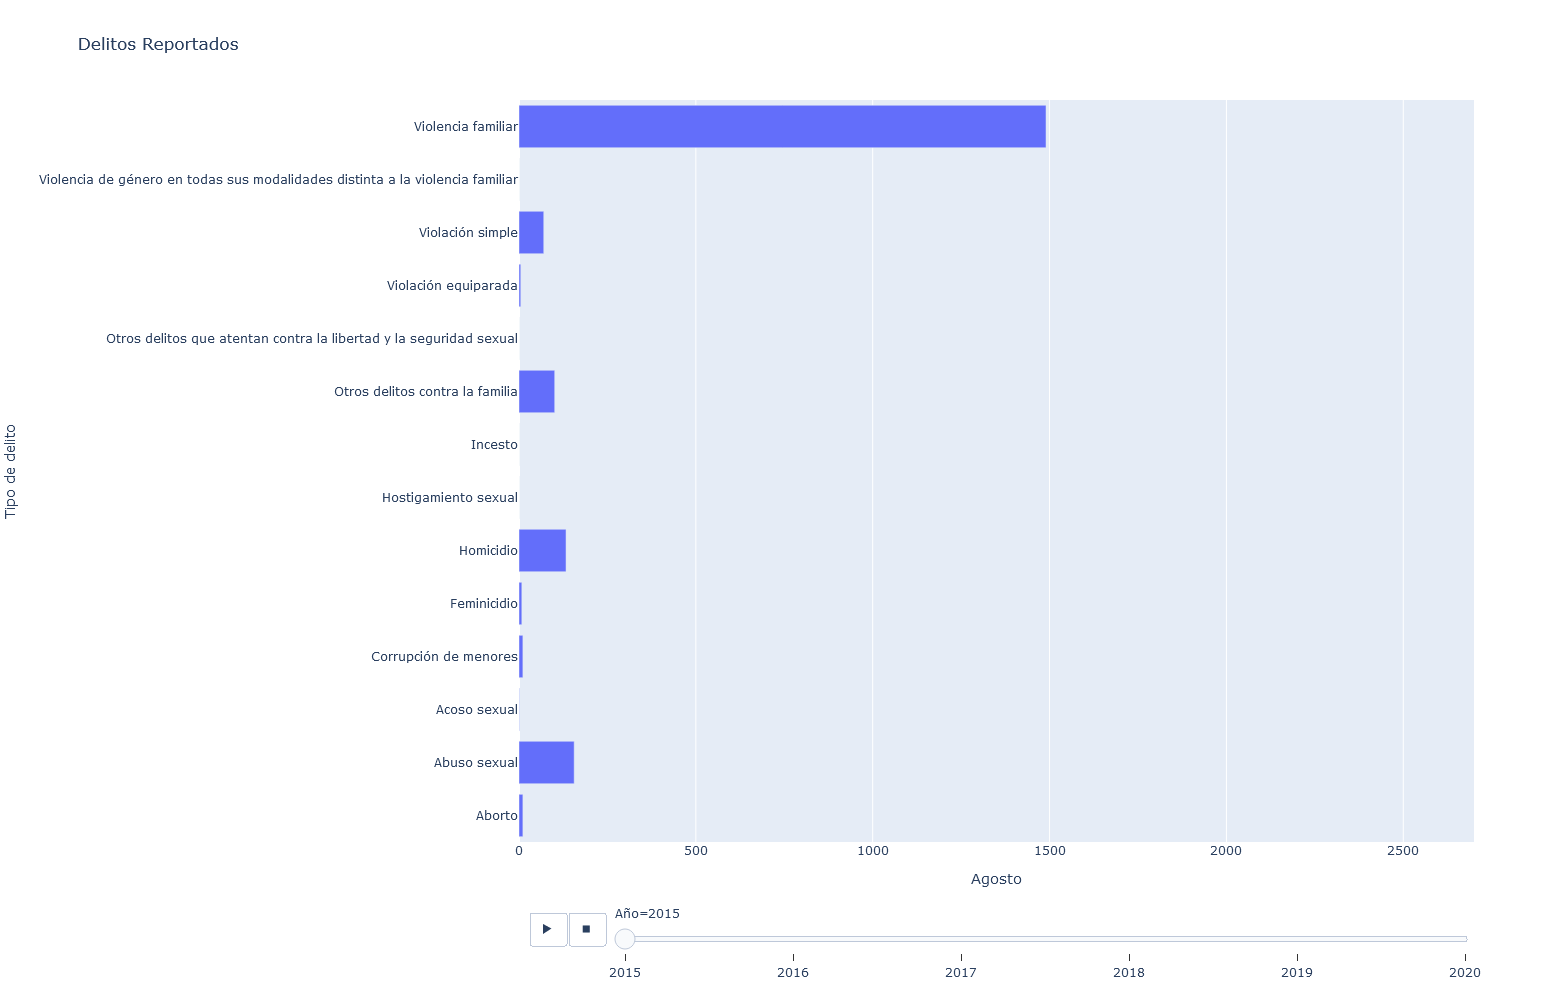

In [88]:
fig = px.bar(md[(md["Entidad"]=="Ciudad de México") & md["Tipo de delito"].isin(["Violencia familiar", "Abuso sexual", "Feminicidio", "Homicidio","Violación simple",
                                               "Acoso sexual", "Violación equiparada", "Aborto", "Hostigamiento sexual", "Incesto",
                                               "Violencia de género en todas sus modalidades distinta a la violencia familiar",
                                               "Otros delitos contra la familia", "Corrupción de menores",
                                               "Otros delitos que atentan contra la libertad y la seguridad sexual"])],
                                                 x= "Agosto", y ="Tipo de delito" , animation_frame = "Año", range_x=[0,2700],
                                                animation_group="Tipo de delito", title="Delitos Reportados", height=1000)
fig.show()

In [221]:
fig = px.line( x=x, y=md_delitos.iloc[-1,4:])
fig.show()

NameError: name 'x' is not defined

In [44]:
for delito in md["Tipo de delito"].unique(): print(delito)

Homicidio
Lesiones
Feminicidio
Aborto
Otros delitos que atentan contra la vida y la integridad corporal
Secuestro
Tráfico de menores
Rapto
Otros delitos que atentan contra la libertad personal
Abuso sexual
Acoso sexual
Hostigamiento sexual
Violación simple
Violación equiparada
Incesto
Otros delitos que atentan contra la libertad y la seguridad sexual
Robo
Fraude
Abuso de confianza
Extorsión
Daño a la propiedad
Despojo
Otros delitos contra el patrimonio
Violencia familiar
Violencia de género en todas sus modalidades distinta a la violencia familiar
Incumplimiento de obligaciones de asistencia familiar
Otros delitos contra la familia
Corrupción de menores
Trata de personas
Otros delitos contra la sociedad
Narcomenudeo
Amenazas
Allanamiento de morada
Evasión de presos
Falsedad
Falsificación
Contra el medio ambiente
Delitos cometidos por servidores públicos
Electorales
Otros delitos del Fuero Común


In [15]:
vfc = pd.read_csv("Victimas_Fuero_Comun_2015sep2020.csv", encoding="latin_1")

In [16]:
vfc.head(10)

Año  Clave_Ent         Entidad            Bien jurídico afectado  \
0  2015          1  Aguascalientes  La vida y la Integridad corporal   
1  2015          1  Aguascalientes  La vida y la Integridad corporal   
2  2015          1  Aguascalientes  La vida y la Integridad corporal   
3  2015          1  Aguascalientes  La vida y la Integridad corporal   
4  2015          1  Aguascalientes  La vida y la Integridad corporal   
5  2015          1  Aguascalientes  La vida y la Integridad corporal   
6  2015          1  Aguascalientes  La vida y la Integridad corporal   
7  2015          1  Aguascalientes  La vida y la Integridad corporal   
8  2015          1  Aguascalientes  La vida y la Integridad corporal   
9  2015          1  Aguascalientes  La vida y la Integridad corporal   

  Tipo de delito  Subtipo de delito                 Modalidad   Sexo  \
0      Homicidio   Homicidio doloso         Con arma de fuego  Mujer   
1      Homicidio   Homicidio doloso           Con arma blanca  Mujer   
2      Homicidio   Homicidio doloso         Con otro elemento  Mujer   
3      Homicidio   Homicidio doloso           No especificado  Mujer   
4      Homicidio  Homicidio culposo         Con arma de fuego  Mujer   
5      Homicidio  Homicidio culposo           Con arma blanca  Mujer   
6      Homicidio  Homicidio culposo  En accidente de tránsito  Mujer   
7      Homicidio  Homicidio culposo         Con otro elemento  Mujer   
8      Homicidio  Homicidio culposo           No especificado  Mujer   
9       Lesiones   Lesiones dolosas         Con arma de fuego  Mujer   

            Rango de edad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  \
0  Menores de edad (0-17)      0  ...      0      0     0      0      0   
1  Menores de edad (0-17)      0  ...      0      0     0      0      0   
2  Menores de edad (0-17)      0  ...      0      0     1      0      0   
3  Menores de edad (0-17)      0  ...      0      0     0      0      0   
4  Menores de edad (0-17)      0  ...      0      0     0      0      0   
5  Menores de edad (0-17)      0  ...      0      0     0      0      0   
6  Menores de edad (0-17)      0  ...      1      1     2      1      0   
7  Menores de edad (0-17)      0  ...      0      0     0      0      0   
8  Menores de edad (0-17)      0  ...      0      1     0      0      0   
9  Menores de edad (0-17)      0  ...      0      0     0      0      0   

   Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0       0           0      0.0        0.0        0.0  
1       0           0      0.0        0.0        0.0  
2       1           0      0.0        0.0        0.0  
3       0           0      0.0        0.0        0.0  
4       0           0      0.0        0.0        0.0  
5       0           0      0.0        0.0        0.0  
6       1           1      0.0        0.0        0.0  
7       0           0      0.0        0.0        0.0  
8       0           0      0.0        0.0        0.0  
9       0           0      0.0        0.0        0.0  

[10 rows x 21 columns]

In [17]:
vfc = vfc.drop(columns=["Bien jurídico afectado", "Subtipo de delito", "Modalidad"])
vfc

Año  Clave_Ent         Entidad  \
0      2015          1  Aguascalientes   
1      2015          1  Aguascalientes   
2      2015          1  Aguascalientes   
3      2015          1  Aguascalientes   
4      2015          1  Aguascalientes   
...     ...        ...             ...   
44155  2020         32       Zacatecas   
44156  2020         32       Zacatecas   
44157  2020         32       Zacatecas   
44158  2020         32       Zacatecas   
44159  2020         32       Zacatecas   

                                          Tipo de delito             Sexo  \
0                                              Homicidio            Mujer   
1                                              Homicidio            Mujer   
2                                              Homicidio            Mujer   
3                                              Homicidio            Mujer   
4                                              Homicidio            Mujer   
...                                                  ...              ...   
44155  Otros delitos que atentan contra la libertad p...  No identificado   
44156                                          Extorsión  No identificado   
44157                              Corrupción de menores  No identificado   
44158                                  Trata de personas  No identificado   
44159                   Otros delitos contra la sociedad  No identificado   

                Rango de edad  Enero  Febrero  Marzo  Abril  Mayo  Junio  \
0      Menores de edad (0-17)      0        0      0      0     0      0   
1      Menores de edad (0-17)      0        0      0      0     0      0   
2      Menores de edad (0-17)      0        0      0      0     1      0   
3      Menores de edad (0-17)      0        0      0      0     0      0   
4      Menores de edad (0-17)      0        0      0      0     0      0   
...                       ...    ...      ...    ...    ...   ...    ...   
44155         No identificado      0        0      0      0     0      0   
44156         No identificado      0        0      0      0     0      0   
44157         No identificado      0        0      0      0     0      0   
44158         No identificado      0        0      0      0     0      0   
44159         No identificado      0        0      0      0     0      0   

       Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0          0       0           0      0.0        0.0        0.0  
1          0       0           0      0.0        0.0        0.0  
2          0       1           0      0.0        0.0        0.0  
3          0       0           0      0.0        0.0        0.0  
4          0       0           0      0.0        0.0        0.0  
...      ...     ...         ...      ...        ...        ...  
44155      0       0           0      NaN        NaN        NaN  
44156      0       0           0      NaN        NaN        NaN  
44157      0       0           0      NaN        NaN        NaN  
44158      0       0           0      NaN        NaN        NaN  
44159      0       0           0      NaN        NaN        NaN  

[44160 rows x 18 columns]

In [18]:
vfc = vfc.fillna(0)

In [19]:
vfc.iloc[:,-3:] = vfc.iloc[:,-3:].astype(int)
vfc

Año  Clave_Ent         Entidad  \
0      2015          1  Aguascalientes   
1      2015          1  Aguascalientes   
2      2015          1  Aguascalientes   
3      2015          1  Aguascalientes   
4      2015          1  Aguascalientes   
...     ...        ...             ...   
44155  2020         32       Zacatecas   
44156  2020         32       Zacatecas   
44157  2020         32       Zacatecas   
44158  2020         32       Zacatecas   
44159  2020         32       Zacatecas   

                                          Tipo de delito             Sexo  \
0                                              Homicidio            Mujer   
1                                              Homicidio            Mujer   
2                                              Homicidio            Mujer   
3                                              Homicidio            Mujer   
4                                              Homicidio            Mujer   
...                                                  ...              ...   
44155  Otros delitos que atentan contra la libertad p...  No identificado   
44156                                          Extorsión  No identificado   
44157                              Corrupción de menores  No identificado   
44158                                  Trata de personas  No identificado   
44159                   Otros delitos contra la sociedad  No identificado   

                Rango de edad  Enero  Febrero  Marzo  Abril  Mayo  Junio  \
0      Menores de edad (0-17)      0        0      0      0     0      0   
1      Menores de edad (0-17)      0        0      0      0     0      0   
2      Menores de edad (0-17)      0        0      0      0     1      0   
3      Menores de edad (0-17)      0        0      0      0     0      0   
4      Menores de edad (0-17)      0        0      0      0     0      0   
...                       ...    ...      ...    ...    ...   ...    ...   
44155         No identificado      0        0      0      0     0      0   
44156         No identificado      0        0      0      0     0      0   
44157         No identificado      0        0      0      0     0      0   
44158         No identificado      0        0      0      0     0      0   
44159         No identificado      0        0      0      0     0      0   

       Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0          0       0           0        0          0          0  
1          0       0           0        0          0          0  
2          0       1           0        0          0          0  
3          0       0           0        0          0          0  
4          0       0           0        0          0          0  
...      ...     ...         ...      ...        ...        ...  
44155      0       0           0        0          0          0  
44156      0       0           0        0          0          0  
44157      0       0           0        0          0          0  
44158      0       0           0        0          0          0  
44159      0       0           0        0          0          0  

[44160 rows x 18 columns]

In [9]:
for delito in vfc["Tipo de delito"].unique(): print(delito)

Homicidio
Lesiones
Feminicidio
Otros delitos que atentan contra la vida y la integridad corporal
Secuestro
Tráfico de menores
Rapto
Otros delitos que atentan contra la libertad personal
Extorsión
Corrupción de menores
Trata de personas
Otros delitos contra la sociedad
Aborto


In [20]:
for estado in vfc["Entidad"].unique(): print(estado)

Aguascalientes
Baja California
Baja California Sur
Campeche
Coahuila de Zaragoza
Colima
Chiapas
Chihuahua
Ciudad de México
Durango
Guanajuato
Guerrero
Hidalgo
Jalisco
México
Michoacán de Ocampo
Morelos
Nayarit
Nuevo León
Oaxaca
Puebla
Querétaro
Quintana Roo
San Luis Potosí
Sinaloa
Sonora
Tabasco
Tamaulipas
Tlaxcala
Veracruz de Ignacio de la Llave
Yucatán
Zacatecas


In [21]:
vfc = vfc.replace(["Veracruz de Ignacio de la Llave", "Michoacán de Ocampo", "Coahuila de Zaragoza"], ["Veracruz", "Michoacán", "Coahuila"])
vfc

Año  Clave_Ent         Entidad  \
0      2015          1  Aguascalientes   
1      2015          1  Aguascalientes   
2      2015          1  Aguascalientes   
3      2015          1  Aguascalientes   
4      2015          1  Aguascalientes   
...     ...        ...             ...   
44155  2020         32       Zacatecas   
44156  2020         32       Zacatecas   
44157  2020         32       Zacatecas   
44158  2020         32       Zacatecas   
44159  2020         32       Zacatecas   

                                          Tipo de delito             Sexo  \
0                                              Homicidio            Mujer   
1                                              Homicidio            Mujer   
2                                              Homicidio            Mujer   
3                                              Homicidio            Mujer   
4                                              Homicidio            Mujer   
...                                                  ...              ...   
44155  Otros delitos que atentan contra la libertad p...  No identificado   
44156                                          Extorsión  No identificado   
44157                              Corrupción de menores  No identificado   
44158                                  Trata de personas  No identificado   
44159                   Otros delitos contra la sociedad  No identificado   

                Rango de edad  Enero  Febrero  Marzo  Abril  Mayo  Junio  \
0      Menores de edad (0-17)      0        0      0      0     0      0   
1      Menores de edad (0-17)      0        0      0      0     0      0   
2      Menores de edad (0-17)      0        0      0      0     1      0   
3      Menores de edad (0-17)      0        0      0      0     0      0   
4      Menores de edad (0-17)      0        0      0      0     0      0   
...                       ...    ...      ...    ...    ...   ...    ...   
44155         No identificado      0        0      0      0     0      0   
44156         No identificado      0        0      0      0     0      0   
44157         No identificado      0        0      0      0     0      0   
44158         No identificado      0        0      0      0     0      0   
44159         No identificado      0        0      0      0     0      0   

       Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0          0       0           0        0          0          0  
1          0       0           0        0          0          0  
2          0       1           0        0          0          0  
3          0       0           0        0          0          0  
4          0       0           0        0          0          0  
...      ...     ...         ...      ...        ...        ...  
44155      0       0           0        0          0          0  
44156      0       0           0        0          0          0  
44157      0       0           0        0          0          0  
44158      0       0           0        0          0          0  
44159      0       0           0        0          0          0  

[44160 rows x 18 columns]

In [22]:
for estado in vfc["Entidad"].unique(): print(estado)

Aguascalientes
Baja California
Baja California Sur
Campeche
Coahuila
Colima
Chiapas
Chihuahua
Ciudad de México
Durango
Guanajuato
Guerrero
Hidalgo
Jalisco
México
Michoacán
Morelos
Nayarit
Nuevo León
Oaxaca
Puebla
Querétaro
Quintana Roo
San Luis Potosí
Sinaloa
Sonora
Tabasco
Tamaulipas
Tlaxcala
Veracruz
Yucatán
Zacatecas


In [143]:
data = requests.get("https://dev-api.datamexico.org/tesseract/data.jsonrecords?cube=gobmx_covid_stats_state&drilldowns=State%2CMonth&measures=Daily+Cases%2CDaily+Deaths%2CDaily+Hospitalized&parents=false&sparse=false")

In [2]:
mob_google_2 = pd.read_csv("google_mobility.csv")
mob_google_2

Country ID Country  Month ID    Month  Retail Percent Change  \
0        mex  Mexico    202002  2020-02               0.658586   
1        mex  Mexico    202003  2020-03             -15.173998   
2        mex  Mexico    202004  2020-04             -56.423232   
3        mex  Mexico    202005  2020-05             -55.275660   
4        mex  Mexico    202006  2020-06             -46.556566   
5        mex  Mexico    202007  2020-07             -39.541544   
6        mex  Mexico    202008  2020-08             -30.723232   

   Grocery and Pharmacy Percent Change  Parks Percent Change  \
0                             1.195960              3.868687   
1                            -3.728250            -13.556207   
2                           -22.470707            -48.316162   
3                           -21.801564            -48.041056   
4                           -15.253535            -39.850505   
5                           -12.222874            -35.921799   
6                            -9.896970            -28.933333   

   Transit Stations Percent Change  Workplaces Percent Change  \
0                         2.325253                   6.894949   
1                       -15.687195                  -9.563050   
2                       -55.644444                 -44.563636   
3                       -55.737048                 -36.996090   
4                       -47.110922                 -28.077778   
5                       -41.542705                 -28.002933   
6                       -36.984880                 -24.279798   

   Residential Percent Change  
0                   -1.165657  
1                    5.364614  
2                   19.333333  
3                   18.703812  
4                   15.426263  
5                   13.944282  
6                   11.830303

In [89]:
covid_st = pd.read_csv("covid_estado.csv")
covid_st

Month ID    Month  State ID                            State  \
0           1  2020-01         1                   Aguascalientes   
1           1  2020-01         2                  Baja California   
2           1  2020-01         3              Baja California Sur   
3           1  2020-01         4                         Campeche   
4           1  2020-01         5             Coahuila de Zaragoza   
..        ...      ...       ...                              ...   
347        11  2020-11        28                       Tamaulipas   
348        11  2020-11        29                         Tlaxcala   
349        11  2020-11        30  Veracruz de Ignacio de la Llave   
350        11  2020-11        31                          Yucatán   
351        11  2020-11        32                        Zacatecas   

     Daily Cases  Daily Deaths  Daily Hospitalized  Daily Suspect  \
0              0             0                   0            137   
1              0             0                   0            199   
2              0             0                   0             63   
3              0             0                   0             21   
4              0             0                   0            188   
..           ...           ...                 ...            ...   
347         1001            73                 144           1819   
348          286            25                  54            212   
349          839           110                 263           1149   
350         1060            64                 131            743   
351         2240           176                 349            743   

     Accum Cases  Accum Deaths  ...  Rate Daily Cases  Rate Accum Cases  \
0              0             0  ...          0.000000          0.000000   
1              0             0  ...          0.000000          0.000000   
2              0             0  ...          0.000000          0.000000   
3              0             0  ...          0.000000          0.000000   
4              0             0  ...          0.000000          0.000000   
..           ...           ...  ...               ...               ...   
347       636642         53700  ...          1.443165        917.861598   
348       166524         24020  ...          1.090762        635.097910   
349       727106         98361  ...          0.517080        448.118909   
350       426392         36002  ...          2.469546        993.391351   
351       247337         20938  ...          7.074706        781.177012   

     Rate Daily Deaths  Rate Accum Deaths  Rate New Cases Report  \
0             0.000000           0.000000               0.000000   
1             0.000000           0.000000               0.000000   
2             0.000000           0.000000               0.000000   
3             0.000000           0.000000               0.000000   
4             0.000000           0.000000               0.000000   
..                 ...                ...                    ...   
347           0.105246          77.420540               2.104916   
348           0.095346          91.608729               1.460705   
349           0.067794          60.620356               0.864676   
350           0.149105          83.876047               2.888903   
351           0.555870          66.129550               8.167495   

     Rate Accum Cases Report  Rate New Deaths Report  \
0                   0.000000                0.000000   
1                   0.000000                0.000000   
2                   0.000000                0.000000   
3                   0.000000                0.000000   
4                   0.000000                0.000000   
..                       ...                     ...   
347               189.164188                2.104916   
348               131.230838                1.460705   
349                92.716276                0.864676   
350               205.226296                2.888903   
351          

In [5]:
crimen_st = pd.read_csv("crimen_estado_mes.csv")
crimen_st

State ID           State  Month ID    Month  Crime Type ID  \
0             1  Aguascalientes    201501  2015-01            101   
1             1  Aguascalientes    201501  2015-01            102   
2             1  Aguascalientes    201501  2015-01            103   
3             1  Aguascalientes    201501  2015-01            104   
4             1  Aguascalientes    201501  2015-01            105   
...         ...             ...       ...      ...            ...   
87035        32       Zacatecas    202008  2020-08            706   
87036        32       Zacatecas    202008  2020-08            707   
87037        32       Zacatecas    202008  2020-08            708   
87038        32       Zacatecas    202008  2020-08            709   
87039        32       Zacatecas    202008  2020-08            710   

                           Crime Type  Value  
0                         Trust Abuse     41  
1                  Damage to Property    201  
2                       Dispossession     19  
3                           Extortion      2  
4                               Fraud    119  
...                               ...    ...  
87035        Letting Prisoners Escape      0  
87036                       Falsehood     10  
87037                   Falsification      3  
87038                    Narcomenudeo     27  
87039  Other Crimes of the Common Law    178  

[87040 rows x 7 columns]

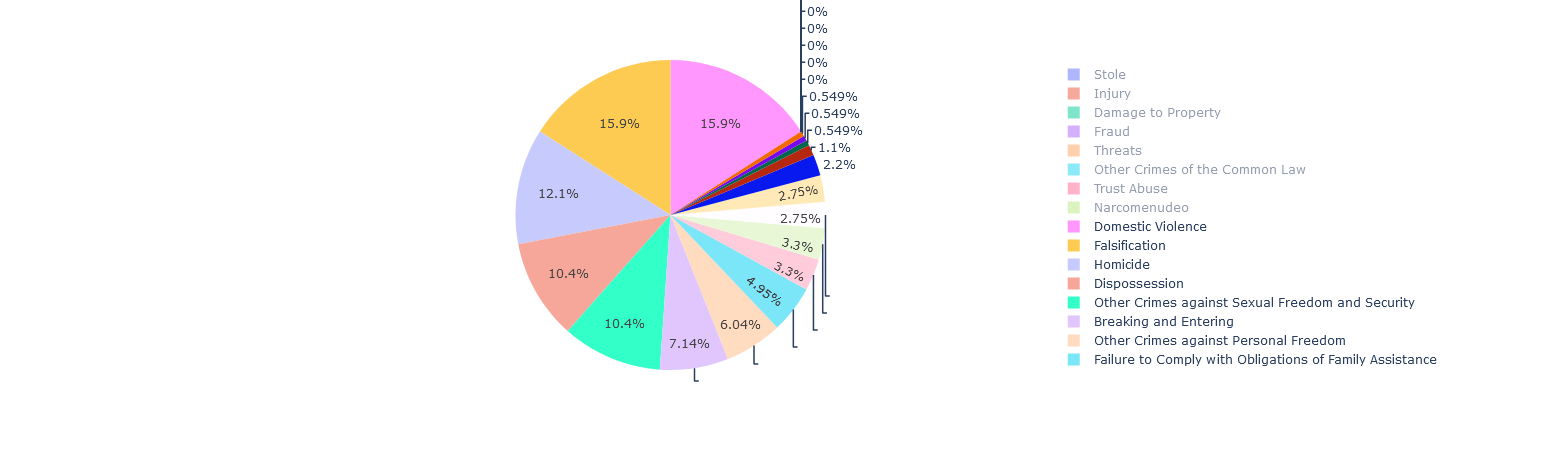

In [8]:
fig = px.pie(crimen_st[(crimen_st["Month ID"]==201501) & (crimen_st["State"]=="Aguascalientes")], values="Value", names="Crime Type", hover_name="Month")
fig.show()

In [6]:
for crime in crimen_st["Crime Type"].unique(): print(crime)

Trust Abuse
Damage to Property
Dispossession
Extortion
Fraud
Stole
Other Crimes against Property
Failure to Comply with Obligations of Family Assistance
Gender-Based Violence in all its Different Modalities to Family Violence
Domestic Violence
Other Offenses against the Family
Sexual Abuse
Sexual Harassment
Incest
Equated Violation
Simple Violation
Other Crimes against Sexual Freedom and Security
Corruption of Minors
Trafficking
Other Crimes against Society
Abortion
Femicide
Homicide
Injury
Other Crimes against Life and Bodily Integrity
Rapture
Kidnapping
Child Trafficking
Other Crimes against Personal Freedom
Breaking and Entering
Threats
Against the Environment
Crimes Committed by Public Servants
Electoral
Letting Prisoners Escape
Falsehood
Falsification
Narcomenudeo
Other Crimes of the Common Law
